![](https://raw.githubusercontent.com/cengineer13/modern_computer_vision/main/LOGO.png)

# **Optical Character Recognition with Paddle**

- Awesome multilingual OCR toolkits based on PaddlePaddle (practical ultra lightweight OCR system, support 80+ languages recognition, provide data annotation and synthesis tools, support training and deployment among server, mobile, embedded and IoT devices)

https://github.com/PaddlePaddle/PaddleOCR



In [1]:
# import the necessary packages
from matplotlib import pyplot as plt
import cv2

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

## 1. INSTALL DEPENDENCIES

In [2]:
#Github repo installation. 
#If you have CUDA 9 or CUDA 10 installed on your machine, please run the following command to install

#!python -m pip install paddlepaddle-gpu -i https://mirror.baidu.com/pypi/simple

In [3]:
#Install paddleocr 
#!pip install paddleocr

In [65]:
#clone github ichida fontlar borligi sababli
#!git clone https://github.com/PaddlePaddle/PaddleOCR

# 2. Model predicting

In [9]:
from paddleocr import PaddleOCR #for recognation
from paddleocr import draw_ocr #for drawing
import os

.\Datasets\images\drug1.jpg


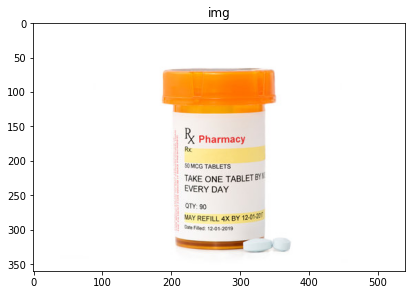

In [28]:
#jupyter fayl turgan joyga qarab faylga path yasash
img_path = os.path.join('.','Datasets','images','drug1.jpg')
print(img_path)
image = cv2.imread(img_path)
imshow('img', image)


In [30]:
#OCR classidan obyekt olamiz
ocr_model = PaddleOCR(lang='en')
#image pathni yuborib prediction olamiz
results = ocr_model.ocr(image)


[2022/05/08 18:49:22] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, det_algorithm='DB', det_model_dir='C:\\Users\\murod/.paddleocr/whl\\det\\en\\en_ppocr_mobile_v2.0_det_infer', det_limit_side_len=960, det_limit_type='max', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_box_type='quad', det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, det_fce_box_type='poly', rec_algorithm='CRNN', rec_model_dir='C:\\Users\\murod/.paddleocr/whl\\rec\\en\\en_number_mobile_v2.0_rec_infer', rec_image_shape='3, 32, 320', rec_batch_num=6, max_text_length=25, re

In [34]:
#model bbox, text va probabiltunni qaytaradi
print(results)
print(type(results)) 
print(results[0])#birinchi topgan text featureslari 
print(results[0][0]) #bbox of first text
print(results[0][1]) #text

[[[[220.0, 198.0], [288.0, 201.0], [288.0, 215.0], [219.0, 213.0]], ('50MCG TABLETS', 0.9183028340339661)], [[[218.0, 218.0], [335.0, 215.0], [336.0, 232.0], [219.0, 235.0]], ('TAKE ONE TABLETBL', 0.9577547907829285)], [[[219.0, 232.0], [284.0, 235.0], [283.0, 250.0], [218.0, 246.0]], ('EVErY DAY', 0.8854163289070129)], [[[219.0, 256.0], [253.0, 259.0], [252.0, 274.0], [218.0, 272.0]], ('QTY:90', 0.9380066990852356)], [[[217.0, 275.0], [331.0, 272.0], [332.0, 289.0], [218.0, 293.0]], ('MAY REFILL 4X BY12-012', 0.920601487159729)], [[[221.0, 289.0], [293.0, 292.0], [293.0, 306.0], [220.0, 304.0]], ('12012019', 0.9902629852294922)]]
<class 'list'>
[[[220.0, 198.0], [288.0, 201.0], [288.0, 215.0], [219.0, 213.0]], ('50MCG TABLETS', 0.9183028340339661)]
[[220.0, 198.0], [288.0, 201.0], [288.0, 215.0], [219.0, 213.0]]
('50MCG TABLETS', 0.9183028340339661)


In [36]:
## grab text 
for res in results:
    print(res[1][0])

50MCG TABLETS
TAKE ONE TABLETBL
EVErY DAY
QTY:90
MAY REFILL 4X BY12-012
12012019


In [37]:
text_list = [res[1][0] for res in results]
text_list

['50MCG TABLETS',
 'TAKE ONE TABLETBL',
 'EVErY DAY',
 'QTY:90',
 'MAY REFILL 4X BY12-012',
 '12012019']

# 3.Visualizing

In [57]:
#list comprehension yordamida featurelarni alohida listga yozib olamiz. 
bboxes = [res[0] for res in results]
texts = [res[1][0] for res in results]
scores =[res[1][1] for res in results]


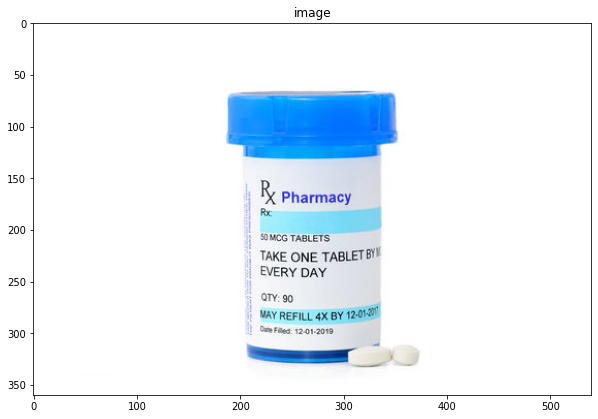

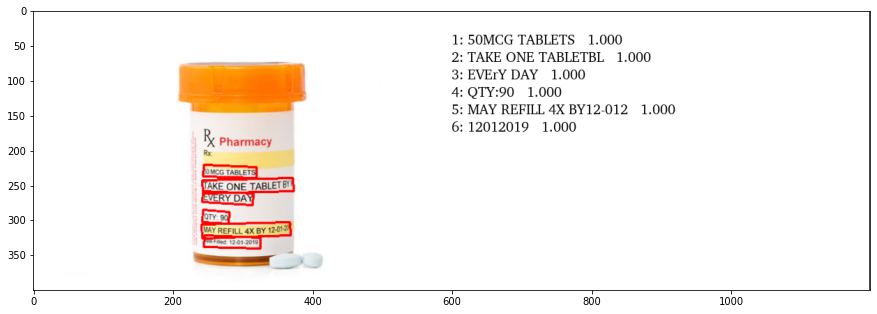

In [62]:
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
imshow('image', image, size=15)

#alohida font bolishi kerak.tanishi uchun. Github PaddleOCR\doc\fonts papkasida mavjud
font_path = os.path.join('','Datasets', 'fonts', 'latin.ttf')

#paddleocr.draw_ocr funksiyasi yordamida kerakli argument jonatilib ekranga chizamiz
annotated = draw_ocr(image, bboxes, texts, font_path=font_path)

plt.figure(figsize=(15,15))
plt.imshow(annotated)


# 4.Trying on rotated images

.\Datasets\images\drug4.jpg
[2022/05/08 19:21:09] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, det_algorithm='DB', det_model_dir='C:\\Users\\murod/.paddleocr/whl\\det\\en\\en_ppocr_mobile_v2.0_det_infer', det_limit_side_len=960, det_limit_type='max', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_box_type='quad', det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, det_fce_box_type='poly', rec_algorithm='CRNN', rec_model_dir='C:\\Users\\murod/.paddleocr/whl\\rec\\en\\en_number_mobile_v2.0_rec_infer', rec_image_shape='3, 32, 320', rec_batch_n

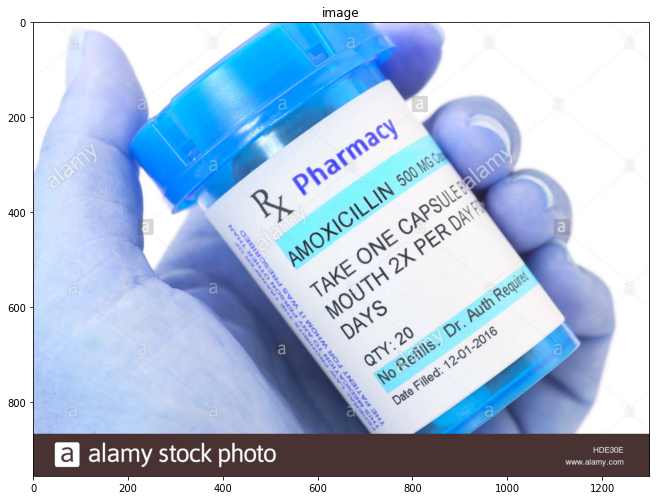

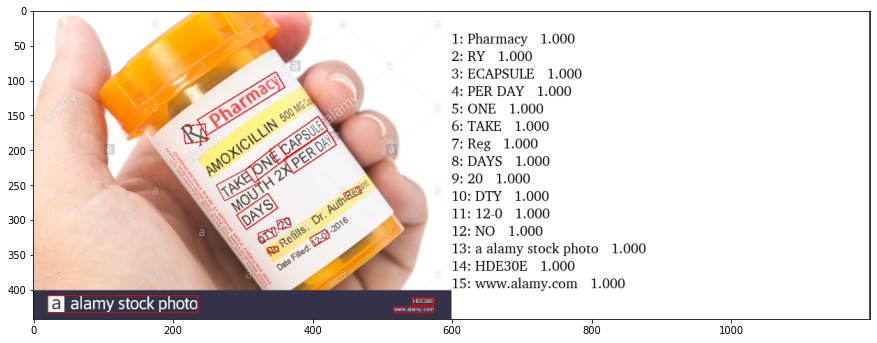

In [66]:
img_path = os.path.join('.','Datasets','images','drug4.jpg')
print(img_path)

#OCR classidan obyekt olamiz
ocr_model = PaddleOCR(lang='en')
#image pathni yuborib prediction olamiz
prediction = ocr_model.ocr(image)


#list comprehension yordamida featurelarni alohida listga yozib olamiz. 
bboxes = [res[0] for res in prediction]
texts = [res[1][0] for res in prediction]
scores =[res[1][1] for res in prediction]


image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
imshow('image', image, size=15)

#alohida font bolishi kerak.tanishi uchun. Github PaddleOCR\doc\fonts papkasida mavjud
font_path = os.path.join('','Datasets', 'fonts', 'latin.ttf')

#paddleocr.draw_ocr funksiyasi yordamida kerakli argument jonatilib ekranga chizamiz
annotated = draw_ocr(image, bboxes, texts, font_path=font_path)

plt.figure(figsize=(15,15))
plt.imshow(annotated)
